<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/02_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression With Tensorflow**

| Hyperparameter | Typical Values |
|---|---|
| **Input Layer Shape** | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction |
| Hidden Layers | Problem specific, minimum=1, maximum=unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually `ReLU`(rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss Function | `MSE`(mean squared error) or `MAE`(mean absolute error)/`Huber`(combination of MAE/MSE) if outliers |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` |



# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, evern shorter.... predicting a number

In [76]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


## Creating data to view and fit

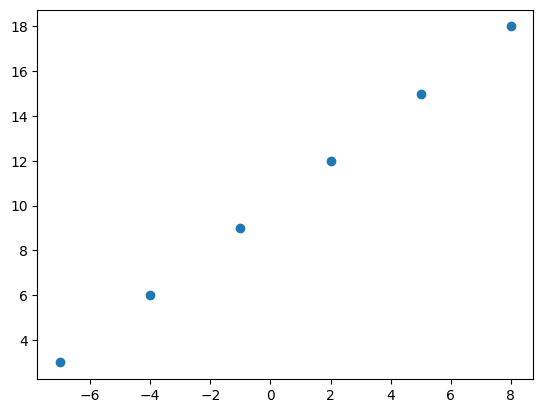

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualize it
plt.scatter(X, y)

In [78]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18.])

In [79]:
y == X + 10  # This is the relationship between our dependent variable(y) and independent variable(x)

array([ True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [80]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant(654332)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=654332>)

##### From this above house price cell we know about the shapes of both features and labels. Here `house_info` is our feature deriving the `house_price` which is our label our output we can say.

In [81]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((6,), (6,))

In [82]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [83]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [84]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

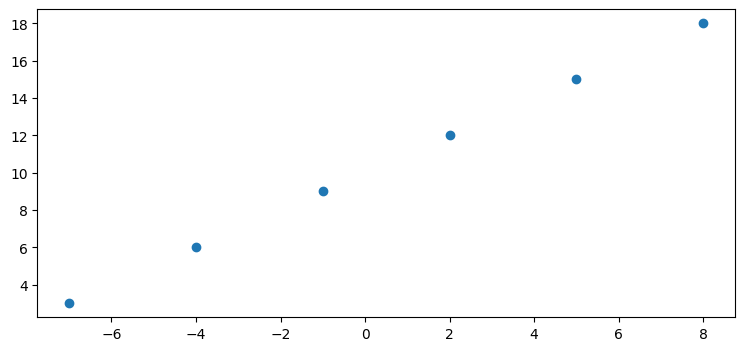

In [85]:
plt.figure(figsize=(9,4))
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the functio which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)


In [86]:
# set random_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 10.4542 - mae: 10.4542
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.4417 - mae: 10.4417
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.4292 - mae: 10.4292
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.4167 - mae: 10.4167
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.4042 - mae: 10.4042


In [87]:
# Check out X and y
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [91]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([11.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.3321457]], dtype=float32)

## Improving our model